# TP Semanal 2

## Consignas

<img src="consigna.png">

<b>Consignas de la actividad:</b>

👉  Hallar la transferencia T=\frac{Vo}{Vi} en función de ωo y Q.

👉  Obtener el valor de los componentes del circuito de forma tal que ωo=1 y Q=3

👉  Ajustar el valor de R1 de forma tal que |T(0)|=20dB.

<b>Bonus:</b>
<ul>
    <li>+10 💎 Obtener los valores de la red normalizados en frecuencia e impedancia.</li>
    <li>+10 🎓 Calcular las sensibilidades  $\mathrm{S}_{w0}^{C}$, $\mathrm{S}_{Q}^{R2}$ y $\mathrm{S}_{Q}^{R3}$ </li>
    <li>+10 🤯 Recalcular los valores de la red para que cumpla con una transferencia Butterworth.</li>
    <li>+10  🎸 Cómo podría obtener un circuito pasabanda con los mismos componentes originales y con qué parámetros quedaría diseñado (Ver ejemplo 4.6 en Schaumann).</li>
    <li>+10  ⚽️ Simulación circuital de todos los experimentos.</li>
    <li>+10  🍺 Presentación en jupyter notebook</li>
</ul>


## Resolucion

### Calculos

In [1]:
from IPython.display import IFrame
IFrame("TP Semanal 2.pdf", width=1000, height=700)

### Simulaciones en Python

#### Defino clase segundo orden para facilitarme el trabajo

In [2]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, bodePlot

BandaDePaso = {
    "PASA_BAJOS": 0,
    "PASA_ALTOS": 1,
    "PASA_BANDAS": 2,
    "PASA_TODO": 3,
    "ELIMINA_BANDA": 4
}

class SistemaSegundoOrden:
    def __init__(self, k, w0, q, bandpass):
        self.k = k
        self.w0 = w0
        self.q = q
        self.bandpass = bandpass

    def printGraficos(self):
        if self.bandpass == BandaDePaso["PASA_BAJOS"]:
            num = [self.w0**2]
        elif self.bandpass == BandaDePaso["PASA_ALTOS"]:
            num = [1, 0, 0]
        elif self.bandpass == BandaDePaso["PASA_BANDAS"]:
            num = [self.w0/self.q, 0]
        elif self.bandpass == BandaDePaso["ELIMINA_BANDA"]:
            num = [1, 0, 0]
        else:
            num = [1, -self.w0/self.q, self.w0**2]

        transf = TransferFunction( num, [1, self.w0/self.q, self.w0**2] )
        bodePlot(transf, fig_id=1,filter_description=f"Q={self.q}\nK={self.k}" )
        pzmap(transf, fig_id=2)

#### Simulacion para filtro pasabajos de segundo orden
Caracteristicas del sistema: W0=1 Q=3 K=10

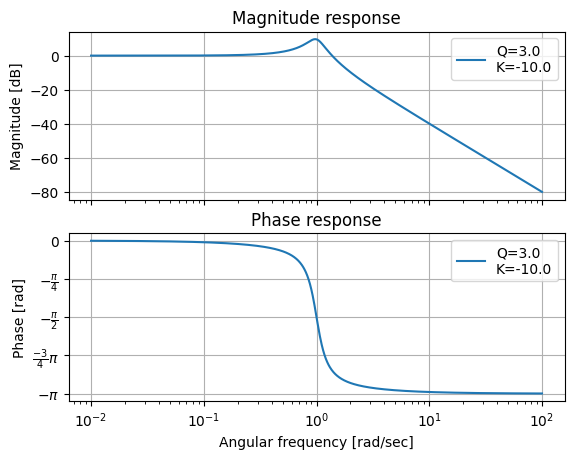

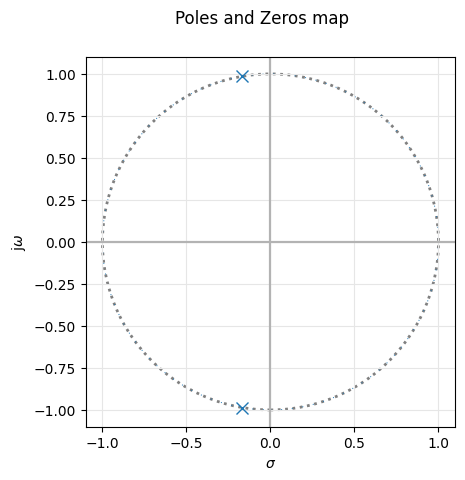

In [3]:
# Componentes
r1= 100
r2= 3*(10**3)
r3= 1*(10**3)
c = 1*(10**-3)

# Parametros del sistema w0=1, Q=3, k=10, pasabajos
k = -r3/r1
w0 = 1/(r3 * c)
q = r2 / r3 

# Genero sistema y exporto graficos
mySys1 = SistemaSegundoOrden(k, w0, q, BandaDePaso["PASA_BAJOS"])
mySys1.printGraficos()

#### Simulacion para filtro pasabajos de segundo orden Butterworth
Caracteristicas del sistema: W0=1 Q=1/raiz(2) K=10

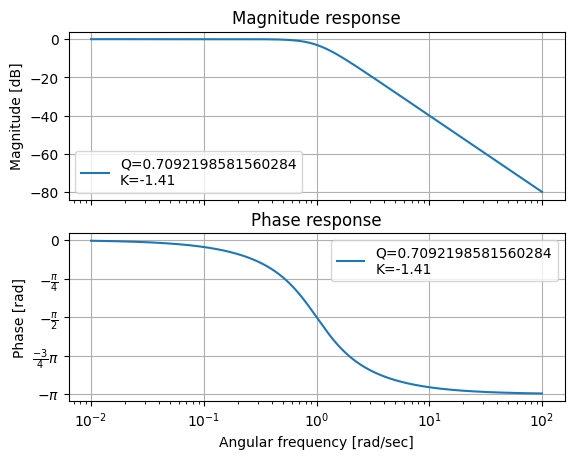

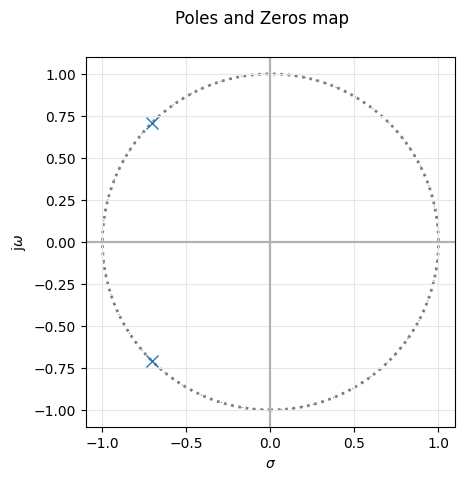

In [4]:
# Componentes
r1= 1*(10**3)
r2= 1*(10**3)
r3= 1.41*(10**3)
c = 1*(10**-3)

# Parametros del sistema w0=1, Q=1/raiz(2), k=10, pasabajos
k = -r3/r1
wo = 1/(r3 * c)
q = r2 / r3 

# Genero sistema y exporto graficos
mySys2 = SistemaSegundoOrden(k, w0, q, BandaDePaso["PASA_BAJOS"])
mySys2.printGraficos()

#### Simulacion para filtro pasabandas de segundo orden
Caracteristicas del sistema: w0=1 Q=1/raiz(2) K=10

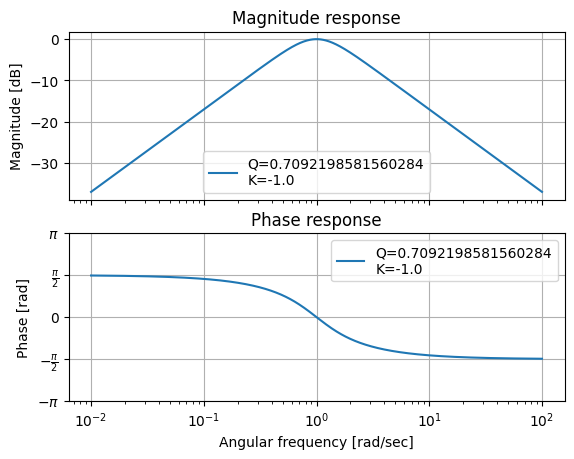

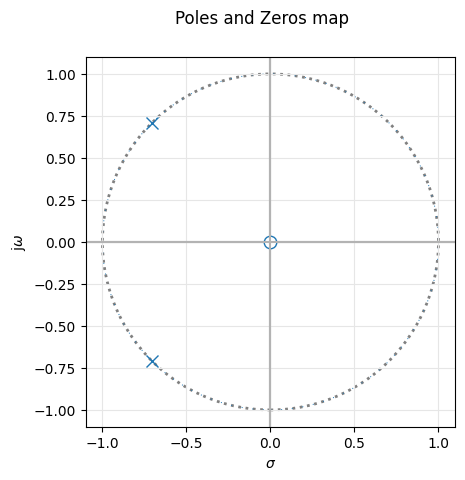

In [5]:
# Componentes
r1= 1*(10**3)
r2= 1*(10**3)
r3= 1.41*(10**3)
c = 1*(10**-3)

# Parametros del sistema w0=1, Q=1/raiz(2), k=1, pasabandas
k = -r2/r1
wo = 1/(r3 * c)
q = r2 / r3

# Genero sistema y exporto graficos
mySys3 = SistemaSegundoOrden(k, w0, q, BandaDePaso["PASA_BANDAS"])
mySys3.printGraficos()

### Simulaciones en LTSpice

#### Simulacion Pasabajos
<img src="Simulacion Pasabajos.jpg">

#### Siumlacion Pasabandas
<img src="Simulacion Pasabanda.jpg">

#### Comentario
Como comentario agrego que me llamó la atención el operacional U2 de la simulación de LTSpice justo arriba de esta sección.
Por lo visto en TC1 me hubiera parecido más razonable que el orden del diferencial de entrada fuese al revés. De tal modo que U3 realimente positivo pero con una señal previamente invertida. Es decir que U2 se comportaría como amplificador inversor de ganancia -1.
Sin embargo, haciendo pruebas en el simulador, verifiqué que el orden de esa entrada diferencial no afecta en lo absoluto en el sistema. Es decir, de las dos formas que acabo de mencionar se comporta igual.
No hice un análisis profundo para sacar una conclusión de por qué pasa esto pero me llamó la atención y me parece interesante dejarlo plasmado acá.